In [1]:
# Question 6: Write a Python program to: 
# ● Train an AdaBoost Classifier on the Breast Cancer dataset 
# ● Print the model accuracy 
# (Include your Python code and output in the code box below.) 
#Answer:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost model
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9736842105263158


In [2]:
# Question 7: Write a Python program to: 
# ● Train a Gradient Boosting Regressor on the California Housing dataset ● Evaluate performance using R-squared score 
# (Include your Python code and output in the code box below.) 
# Answer: 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor R-squared Score:", r2)


Gradient Boosting Regressor R-squared Score: 0.8004451261281281


In [5]:
# Question 8: Write a Python program to: 
# ● Train an XGBoost Classifier on the Breast Cancer dataset 
# ● Tune the learning rate using GridSearchCV 
# ● Print the best parameters and accuracy 
# (Include your Python code and output in the code box below.) 
# Answer: 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    subsample=1,
    colsample_bytree=1,
    eval_metric='logloss'
)

# Parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Grid Search
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Accuracy of XGBoost Classifier:", accuracy)



Best Parameters: {'learning_rate': 0.05}
Accuracy of XGBoost Classifier: 0.956140350877193


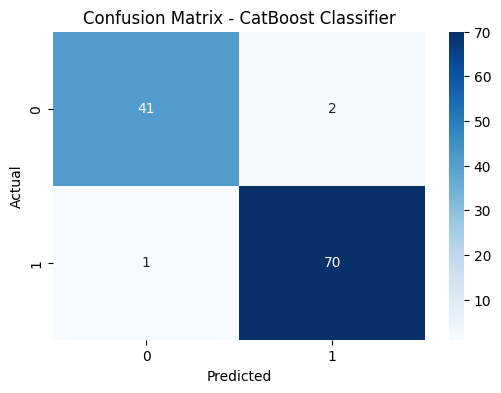

In [6]:
# Question 9: Write a Python program to: 
# ● Train a CatBoost Classifier 
# ● Plot the confusion matrix using seaborn 
# (Include your Python code and output in the code box below.) 
# Answer: 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost Classifier (silent mode)
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=False)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



C:\Users\vaibh\AppData\Local\Temp\ipykernel_12508\2095465839.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_12508\2095465839.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

0:	total: 2.09ms	remaining: 417ms
100:	total: 164ms	remaining: 161ms
199:	total: 333ms	remaining: 0us
Best Parameters: {'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC Score: 0.9950396825396826


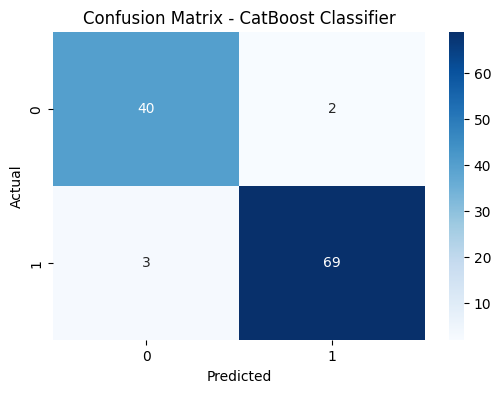

In [9]:
#Question 10: Write a Python program to:
# Import libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Identify categorical features (none in this dataset, just for template)
cat_features = []  # No categorical features in Breast Cancer dataset

# Handle missing values (just as template, there are none in this dataset)
for col in X.select_dtypes(include=['float', 'int']):
    X[col].fillna(X[col].median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize CatBoost Classifier
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_state=42,
    cat_features=cat_features,
    verbose=100,
    class_weights=[1, y.value_counts()[0]/y.value_counts()[1]]  # handle imbalance
)

# Hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
